## This document contains the code used to wrangle and clean the data and perform the required visualizations.

### Project Overview:
<br>
The goal of this project is to analyze data from the very popular twitter handle @dog_rates . They post humorous dog photos and rate the dogs in a comical way.
<br>
This Jupyter Notebook contains the code used to wrangle, clean and perform the visualizations. The final report can be found under the Final_Report

Problems I want to solve:

1. ### Which dog stage is the most common?
2. ### Which dog breed is the most popular?
3. ### What is the average rating of all the dogs
4. ### What is the average rating for each dog stage, which dog stage receives the most favorites and retweets?
5. ### Which rating receives the most likes, the most retweets?


# Gather


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
import requests
import os
folder_name = 'ud_download'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [4]:
api_key             = 'insert-key'
api_secret_key      = 'insert-key'
access_token        = 'insert-key'
access_token_secret = 'insert-key'

In [5]:
image_predictions = pd.read_csv('ud_download/image-predictions.tsv', sep = '\t')

twitter favourites and likes: run a loop through every id

In [6]:
import tweepy
import json

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth, wait_on_rate_limit=True)


#basically get a list of URLs that I want and then run a loop and save the results there

all_tweets = df.tweet_id.values

#df2 = pd.DataFrame.from_dict(tweet1, orient='columns')

In [7]:
from pandas.io.json import json_normalize

In [8]:
'''
from tqdm import tqdm_notebook as tqdm
df_tweets = pd.DataFrame()
df_missing_tweets = []
for tweet_id in tqdm(all_tweets):
    try:
        #this piece of the code appends the JSON object to the dataframe
        tweet = api.get_status(tweet_id)
        df_tweets = df_tweets.append(json_normalize(tweet._json))  
    except tweepy.TweepError as e:
        df_missing_tweets.append(tweet_id) 
        pass
    
df_tweets.to_csv('tweets_json.txt', index=None, sep=' ', mode = 'a')
'''


"\nfrom tqdm import tqdm_notebook as tqdm\ndf_tweets = pd.DataFrame()\ndf_missing_tweets = []\nfor tweet_id in tqdm(all_tweets):\n    try:\n        #this piece of the code appends the JSON object to the dataframe\n        tweet = api.get_status(tweet_id)\n        df_tweets = df_tweets.append(json_normalize(tweet._json))  \n    except tweepy.TweepError as e:\n        df_missing_tweets.append(tweet_id) \n        pass\n    \ndf_tweets.to_csv('tweets_json.txt', index=None, sep=' ', mode = 'a')\n"

In [9]:
df_missing_tweets = [888202515573088257,
 873697596434513921,
 872668790621863937,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 754011816964026368,
 680055455951884288]


df_tweets=pd.read_csv('tweets_json.txt', sep=' ')




C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (22,23,24,25,26,27,28,29,30,31,36,37,38,39,40,41,42,44,53,54,56,57,59,60,61,62,63,64,65,66,67,68,69,71,73,75,76,79,80,81,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,102,103,105,124,132,133,134,135,136,137,138,139,140,141,146,147,148,149,150,152,161,162,164,165,167,168,169,170,171,172,173,174,175,176,177,179,181,183,184,187,188,189,191,192,193,195,196,197,198,199,200,201,205,206,207,210,211,213,227,241,254,261) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
df_tweets_clean = df_tweets.copy()
image_predictions_clean = image_predictions.copy()
df_clean = df.copy()

# Assess

In this section I will investigate the DataFrames to identify potential problems

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

This data set has 2356 entries. However, the dataset contains retweets (181 values in 'retweet_status_id'). As part of the project specifications, these tweets will be deleted.

__Problem 1 identified__

I also want to investigate the 'doggo', 'floofer', 'pupper' and 'puppo' columns to understand why they aren't in a single column.

In [12]:
df_clean[['tweet_id','doggo', 'floofer', 'pupper','puppo']].loc[110:115]

,tweet_id,doggo,floofer,pupper,puppo
110,871102520638267392,doggo,None,None,None
111,871032628920680449,None,None,None,None
112,870804317367881728,None,None,None,None
113,870726314365509632,None,None,None,None
114,870656317836468226,None,None,None,None
115,870374049280663552,None,None,None,None


As we can see, if a dog is identified as being part of a specific stage it will have the dog stage in the column and if there is no dog stage it is labelled as None.

This format violates one of the principles of tidy data where each observation forms a single column.

__Tidiness Problem 1 identified (will be referred to as Problem 10 below)__

Let's have a look at the rating_denominator column and see what these values are.

In [13]:
df_clean.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [14]:
df_clean.query('rating_denominator !=10').rating_denominator.count()

23

As we can see, there are other values in there besides 10. In fact there are 23 rows that do not have a denominator of 10.

__Problem 2 identified__

What about the actual ratings (rating_numerator)? It was suggested in the project handouts that these values were not entirely correct. A lot of tweets case by case were analyzed and here are a few problems that were identified.

1. For tweets with a rating denominator that weren't 10, the total rating was the sum of the ratings of each dog in the picture.

example: https://twitter.com/dog_rates/status/820690176645140481

2. Some of the ratings were not extracted accurately https://twitter.com/dog_rates/status/883482846933004288  the rating should be 13.5 and not 5

In [15]:
df_clean.loc[45][['tweet_id','rating_numerator']]

tweet_id            883482846933004288
rating_numerator                     5
Name: 45, dtype: object

__Problem 3 identified:__  all the ratings should be extracted properly, for the dogs in case 1, their rating should be normalized as if they had a denominator of 10

I want to make sure the 'timestamp' column has the appropriate data type

In [16]:
type(df_clean.timestamp)

pandas.core.series.Series

This doesn't give us much information so I will dig down again, the results should be in date-time format

In [17]:
type(df_clean.timestamp[0])

str

As we can see, the result is a string. We want a date-time type.

__Problem 4 identified__

I want to make sure the dog stages in columns 'doggo', 'puppo' etc were correctly extracted.

In [18]:
(df_clean['doggo'] =='doggo').sum()

97

In [19]:
sum(df_clean.text.str.contains('doggo', case=False))  #the argument false here makes the query non case sensitive

107

As we can see, the result here is not consistent. I will re-extract these values in every row based on the text from the tweet.

__Problem 5 identified__

Are all the dog names actually names?

In [20]:
df_clean.name.value_counts().head()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Name: name, dtype: int64

As we can see, at least 55 names are not accurate and mislabeled as 'a' which is not a name.

__Problem 6 identified__

<br> Lets move onto the next data set, image_predictions_clean, and look for mistakes and innacuracies there. 

In [21]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The column names p1, p2 and p3 are confusing. From the project handout I understand they stand for 'prediction 1, prediction 2 and prediction 3 based on Udacity's image recognition algorithms.

__Problem 7 identified__

<br> Lets look at the predictions columns of this dataframe

In [22]:
image_predictions_clean[['tweet_id','p1', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog']].loc[5:9]

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
5,666050758794694657,Bernese_mountain_dog,True,English_springer,True,Greater_Swiss_Mountain_dog,True
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
7,666055525042405380,chow,True,Tibetan_mastiff,True,fur_coat,False
8,666057090499244032,shopping_cart,False,shopping_basket,False,golden_retriever,True
9,666058600524156928,miniature_poodle,True,komondor,True,soft-coated_wheaten_terrier,True


It looks like in some cases, the image prediction algorithm did not identify a dog breed. Lets see if there are cases where they did not predict a dog at all. this means that p1_dog, p2_dog AND p3_dog are all False.

In [23]:
image_predictions_clean.query('p1_dog ==0 and p2_dog==0 and p3_dog==0').head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False


Yes, these cases exist.

In [24]:
image_predictions_clean.query('p1_dog ==0 and p2_dog==0 and p3_dog==0').tweet_id.count()

324

In fact there are 324 occurences like these.

__Problem 8 identified.__ There are many times where the image prediction algorith did not predict a dog breed. These rows will have to be removed because it would take too much time looking through 324 images to determine if a dog actually exists within them.

<br> Lets move onto the last data set, df_tweets_clean which contains the information from twitter's API

In [25]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Columns: 310 entries, contributors to user.verified
dtypes: bool(18), float64(83), int64(15), object(194)
memory usage: 5.3+ MB


Right off the bat we can see that there are too many columns (310) to be exact. I have already meticulously looked at the rows and decided that I want the following only

In [26]:
df_tweets_clean = df_tweets_clean[['id','favorite_count','retweet_count']]

In [27]:
df_tweets_clean.head(3)

,id,favorite_count,retweet_count
0,892420643555336193,38045,8321
1,892177421306343426,32663,6147
2,891815181378084864,24587,4069


The column name 'id' here is the tweet id. In the other 2 dataframes, theese columns are named tweet_id and I will have to rename this one accordingly.

__Problem 9 identified__

<br>Problem 10 has already been mentionned above. __Problem 11__ we will be combining all 3 datasets in order to have 1 row per observation (ie: 1 row for each tweet). Currently we have 3 dataframes for each observation.

## Summary of the investigation

<br> The Problems will be seperated into 2 categories:
<br> __Quality__ and __Tidiness__.

<br> __Quality:__
<br> Problem 1: remove retweets
<br> Problem 2. Some of the rating denominators are not 10. In order to analyse the average rating of the set I will normalize those to 10 along with the numerators
<br> Problem 3. Some of the ratings in rating_numerator are not accurate
<br> Problem 4. The timestamps in df_clean.timestamp are in string format when they should be in datetime format
<br> Problem 5 . :The dog stages in twitter_archive_enhanced "doggo, puppo, pupper, floofer" are probably incorrect
<br> Problem 6: Some of the dogs have an invalid name such as 'one', 'his', 'a' etc.
<br> Problem 7: The names of the prediction column in image_predictions are vague and need to be updated so the reader/analyst can better understand the table
<br> Problem 8. In some cases, the algorithm used to predict the dog breed did not predict a dog at all. Remove these rows 
<br> Problem 9: The tweet ID should be named the same in every dataframe

__Tidiness:__
<br> Problem 10, dog stages should all be in 1 column because each variable should form 1 column only
<br> Problem 11: We will be combining all 3 datasets in order to have 1 row per observation (ie: 1 row for each tweet). This will be done in the  'Creating a new Master Dataframe' section.

#### Define. Problem 1: remove retweets in df_clean

#### Code

In [28]:
df_clean[df_clean[['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']].isnull().any(axis=1)==False][['tweet_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']].head(3)

,tweet_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
19,888202515573088257,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000
32,886054160059072513,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000
36,885311592912609280,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000


In [29]:
df_clean.drop(df_clean[df_clean[['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']].isnull().any(axis=1)==False].index, inplace=True)
df_clean.reset_index(drop=True,inplace=True)


#### Test

In [30]:
#TEST SECTION

df_clean[df_clean[['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']].isnull().any(axis=1)==False].shape


(0, 17)

Removing these columns once and for all since they all have a null value now

In [31]:
df_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)


#### Define Problem 2. Some of the rating denominators are not 10. In order to analyse the average rating of the set I will normalize those to 10 along with the numerators

In [32]:
rows_to_look_into = df_clean.query('rating_denominator != 10')
rows_to_look_into[['tweet_id','rating_numerator','rating_denominator']].head()

#change all those numerators by dividing and rounding to nearest .5 then all the denominators change them to 10.
# to fix the numerators after do a for i not in this list.tweet_id then do the find regex thing

,tweet_id,rating_numerator,rating_denominator
263,835246439529840640,960,0
287,832088576586297345,11,15
363,820690176645140481,84,70
429,810984652412424192,24,7
733,758467244762497024,165,150


Observations:
<br>tweet_id: 832088576586297345 This tweet is not a rating, it just account started on 11/15/15. This is not a problem as the row will be ommited once we complete an inner merge with the image prediction algorithm. There is no picture attached to this tweet.
<br>tweet_id: 820690176645140481 7 dogs so the rating is 84/70 * 10
<br>tweet_id: 810984652412424192 rating is 24/7 
<br>tweet_id: 758467244762497024 15 dogs rating is 165/150
<br>tweet_id: 731156023742988288 17 dogs rated 204/170
<br>tweet_id: 713900603437621249 9 dogs with a total rating of 99/90.

Plan: change the numerator to rating_numerator / rating denominator * 10 and set their rating_denominator to 10. For tweet_id 835246439529840640   manually open the tweet (text says 13/10) and change the numerator

In [33]:
ratings_with_denom_not_10 = rows_to_look_into.index
df_clean.loc[ratings_with_denom_not_10,'rating_numerator']   = df_clean['rating_numerator']/df_clean['rating_denominator']*10
df_clean.loc[ratings_with_denom_not_10,'rating_denominator'] = 10
df_clean.loc[263,'rating_numerator'] = 13

#### Test

In [34]:
df_clean.loc[ratings_with_denom_not_10][['tweet_id','rating_numerator','rating_denominator']].head()

,tweet_id,rating_numerator,rating_denominator
263,835246439529840640,13.000000,10
287,832088576586297345,7.333333,10
363,820690176645140481,12.000000,10
429,810984652412424192,34.285714,10
733,758467244762497024,11.000000,10


In [35]:
df_clean.rating_denominator.value_counts()



10    2175
Name: rating_denominator, dtype: int64

All the rows now contain 10 in column rating_denominator, also the numerators were fixed for the dogs that had

#### Define Problem 3. Some of the ratings in rating_numerator are not accurate.

Re-extract the ratings from the text section to assure accuracy, do not include the numerator rows fixed in Problem 2

#### Code

In [36]:
before = df_clean.rating_numerator.value_counts(ascending=False).head(5)

In [37]:
#.apply method lets me use string and re functions on the whole column at once without looping index by index
df_clean['split_text'] = df_clean.text.apply(lambda x: x.split('/10')[0])  
df_clean.loc[set(df_clean.index) - set(ratings_with_denom_not_10),'rating_numerator'] = df_clean.loc[set(df_clean.index) -set(ratings_with_denom_not_10)].split_text.apply(lambda x: re.findall(r"\d*\.\d+|\d+", x)).apply(lambda x: ''.join(x[-1])).apply(lambda x: float(x))


#### Test

In [38]:
after = df_clean.rating_numerator.value_counts(ascending=False).head(5)
results = (pd.concat([before, after], axis=1))
results.reset_index(inplace=True)
results.columns=['rating_numerator', 'count_before', 'count_after']
results.tail()
#as we can see below, there were a few errors, its best to just run this cell and re-calculate everything.

,rating_numerator,count_before,count_after
0,12.0,504,502
1,10.0,444,435
2,11.0,431,427
3,13.0,308,307
4,9.0,156,153


tweet_id 820690176645140481 found on https://twitter.com/dog_rates/status/820690176645140481 has a rating of 84/70. checking that the numerator has not been recalculated to above to 84 (completed rating was adjusted to 12/10 in Problem 2)

In [39]:
df_clean.loc[363][['tweet_id', 'rating_numerator']]

tweet_id            820690176645140481
rating_numerator                    12
Name: 363, dtype: object

Looks good.

#### Define Problem 4. The timestamps in df_clean.timestamp are in string format when they should be in datetime format

Convert the timestamps to datetime format

#### Code

In [40]:
before = type(df_clean.timestamp[0])
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)
#point of this is to see if we get more favourites/retweets at different times during the day or not. Results will appear in v2.0

#### Test

In [41]:
after = type(df_clean.timestamp[0])
print('Before the fixes the type was: ', before , '\n')
print('After the changes the type is:', after)

Before the fixes the type was:  <class 'str'> 

After the changes the type is: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### Define  Problem 5, The given dog stages extracted from the tweets are incorrect

Solution: Re-extract the dog stages from the text column

#### Code

In [42]:
doggo_rows = df_clean[df_clean['text'].str.contains("doggo", case=False)].index
floofer_rows = df_clean[df_clean['text'].str.contains("floof", case=False)].index
pupper_rows = df_clean[df_clean['text'].str.contains("pupper", case=False)].index
puppo_rows = df_clean[df_clean['text'].str.contains("puppo", case=False)].index
no_dog_stage_rows =set(df_clean.index) -set(doggo_rows) - set(floofer_rows) - set(pupper_rows) - set(puppo_rows)

df_clean.loc[doggo_rows,'doggo'] = 'doggo'
df_clean.loc[floofer_rows,'floofer'] = 'floofer'
df_clean.loc[pupper_rows,'pupper'] = 'pupper'
df_clean.loc[puppo_rows,'puppo'] = 'puppo'


#### Test

In [43]:
#putting everything in a dataframe to easily notice the changes
results = pd.DataFrame(columns = ['dog_stage', 'amount_before', 'amount_after'])
dog_stages = ['doggo', 'floof', 'pupper', 'puppo']
results_before= [(df['doggo'] =='doggo').sum(), (df['floofer'] =='floofer').sum(), (df['pupper'] =='pupper').sum(), (df['puppo'] =='puppo').sum()]
results_after = [(df_clean['doggo'] =='doggo').sum(), (df_clean['floofer']=='floofer').sum(), (df_clean['pupper']=='pupper').sum(), (df_clean['puppo']=='puppo').sum()]

results= pd.DataFrame({'dog_stage': dog_stages, 'amount_before': results_before,'amount_after': results_after })
results

,dog_stage,amount_before,amount_after
0,doggo,97,95
1,floof,10,39
2,pupper,257,260
3,puppo,30,33


#### Define Problem 6: Some of the dogs have an invalid name such as 'one', 'his', 'a' etc
I will rename them to 'None' to stay consistent with whats already in the dataframe.

In [44]:
df_clean[df_clean.name.str.islower()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

#### Code

In [45]:
df_clean.loc[df_clean[df_clean.name.str.islower()].index,'name']='None'

#### Test

In [46]:
df_clean[df_clean.name.str.islower()].name.unique()

array([], dtype=object)

The 'name' column has been cleaned. Every word that was lowercased was not a name and was converted to 'None'

#### Define Problem 7: The names of the prediction column in image_predictions are vague and need to be updated so the reader/analyst can better understand the table

I will rename the columns from p1, p2, p3 to prediction_1, prediction_2, and prediction_3. This will give a useful baseline to understand what they are looking at and to interpret the meanings of p1_conf and p1_dog

#### Code

In [47]:
image_predictions_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [48]:
image_predictions_clean.rename(columns={'p1':'prediction_1', 'p2':'prediction_2', 'p3':'prediction_3'}, inplace=True)

#### Test

In [49]:
image_predictions_clean.head(2)

,tweet_id,jpg_url,img_num,prediction_1,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### Define Problem 8. In some cases, the algorithm used to predict the dog breed did not predict a dog at all.

Eliminate the rows from image_predictions that do not contain a prediction of a dog breed. Without checking each tweet picture by picture we cannot know if all of these are dogs. In some cases the twitter account published photos of other animals

In [50]:
#Proof of problem
problem = image_predictions.query('p1_dog == 0 and p2_dog == 0 and p3_dog == 0')
problem.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False


#### Code

In [51]:
images_that_arent_dogs= image_predictions_clean.query('p1_dog ==0 and p2_dog == 0 and p3_dog ==0')
image_predictions_clean.drop(images_that_arent_dogs.index, inplace=True)
image_predictions_clean.reset_index().head(1)

,index,tweet_id,jpg_url,img_num,prediction_1,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog
0,0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### Test

In [52]:
assert (image_predictions.p1.count() - image_predictions_clean.prediction_1.count()) == len(problem)
print('complete')

complete


#### Define Problem 9: The tweet ID should be named the same in every dataframe and should be the same datatype

In [53]:
list(df_clean)[0], list(image_predictions_clean)[0], list(df_tweets_clean)[0]

('tweet_id', 'tweet_id', 'id')

#### Code

In [54]:
df_tweets_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [55]:
list(df_clean)[0], list(image_predictions_clean)[0], list(df_tweets_clean)[0]

('tweet_id', 'tweet_id', 'tweet_id')

#### Define. Problem 10, dog stages should all be in 1 column :
rename the columns, then merge then vertically. Dogs with multiple stages will have their group renamed to 'multiple'

In [56]:
df_doggos = df_clean.iloc[doggo_rows]
df_floofer = df_clean.loc[floofer_rows]
df_pupper = df_clean.loc[pupper_rows]
df_puppo = df_clean.loc[puppo_rows]
df_no_dog_stages = df_clean.loc[no_dog_stage_rows]

df_doggos.drop(['floofer','pupper', 'puppo', 'split_text'], axis =1, inplace =True)
df_floofer.drop(['doggo','pupper', 'puppo', 'split_text'], axis =1, inplace =True)
df_pupper.drop(['doggo','floofer', 'puppo', 'split_text'], axis =1, inplace =True)
df_puppo.drop(['doggo','floofer', 'pupper', 'split_text'], axis =1, inplace =True)
df_no_dog_stages.drop(['floofer','pupper', 'puppo', 'split_text'], axis =1, inplace =True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [57]:
df_doggos.rename(columns={'doggo':'dog_stage'}, inplace=True)
df_floofer.rename(columns={'floofer':'dog_stage'}, inplace=True)
df_pupper.rename(columns={'pupper':'dog_stage'}, inplace=True)
df_puppo.rename(columns={'puppo':'dog_stage'}, inplace=True)
df_no_dog_stages.rename(columns={'doggo':'dog_stage'}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [58]:
frames = [df_doggos, df_floofer, df_pupper, df_puppo, df_no_dog_stages]
results = pd.concat(frames, sort=False)

#results[results['tweet_id'] ==855851453814013952]
multiple_dog_stages = results[results.tweet_id.duplicated()].index
#now just need to replace duplicates
results.loc[multiple_dog_stages,'dog_stage'] ='multiple'
results.drop_duplicates(inplace=True)

In [59]:
results.info()
df_clean=results.copy()
#section is done, condensed all the dog stages into 1 column, there is Multiple and None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 9 to 2174
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                2175 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 203.9+ KB


# Creating a new master dataframe (Problem 11)

The goal of this section is to create a new dataframe that includes all the tweet IDs and their ratings, all the image predictions and the amount of likes and retweet for each tweet.

Currently we have 3 datafarmes: df_clean (contains ratings), image_predictions (contains image predictions) and df_tweets_clean (contains # of likes and retweets). I will start off by identifying the columns I want to remove from df_clean

In [60]:
list(df_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

and now we can drop the following columns

In [61]:
df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'],axis = 1, inplace=True)

Now we can repeat this process for the image prediction dataframe. df_tweets_clean which contains the amount of likes and retweets has already been trimmed.

In [62]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id        1751 non-null int64
jpg_url         1751 non-null object
img_num         1751 non-null int64
prediction_1    1751 non-null object
p1_conf         1751 non-null float64
p1_dog          1751 non-null bool
prediction_2    1751 non-null object
p2_conf         1751 non-null float64
p2_dog          1751 non-null bool
prediction_3    1751 non-null object
p3_conf         1751 non-null float64
p3_dog          1751 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


In [63]:
image_predictions_clean.drop(['jpg_url','img_num'], axis=1, inplace=True)

In [64]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
favorite_count    2340 non-null int64
retweet_count     2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [65]:
df_master = pd.merge(df_clean, image_predictions_clean, how = 'inner', left_on= 'tweet_id', right_on='tweet_id')
df_master = pd.merge(df_master, df_tweets_clean, how = 'inner', left_on = 'tweet_id', right_on = 'tweet_id')
#df_master.drop('id', axis=1, inplace=True)
df_master.to_csv('twitter_archive_master.csv')
df_master.shape

(1684, 20)

Our master dataframe now has 1684 rows and 20 columns. The column names are found below

In [66]:
list(df_master)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'prediction_1',
 'p1_conf',
 'p1_dog',
 'prediction_2',
 'p2_conf',
 'p2_dog',
 'prediction_3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'retweet_count']

# Analysis and Visualizations

## Which dog stage is the most common?

This answer is already given in the DataFrame Results

In [67]:
dog_stage_frequency = df_master.dog_stage.value_counts().to_frame().reset_index().rename(columns={'dog_stage':'frequency', 'index':'dog_stage'})

Text(0.5, 1.0, 'Frequency of Dog Stages')

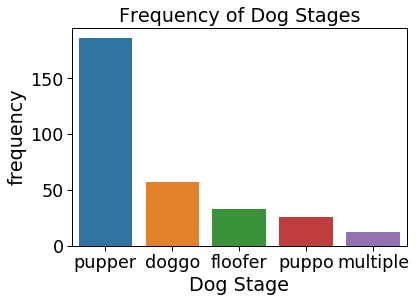

In [68]:
#Visualization

sns.set_context("paper", font_scale=2)
bar_plot = sns.barplot(x = dog_stage_frequency.loc[1:,'dog_stage'], y=dog_stage_frequency['frequency'])
bar_plot.set(xlabel='Dog Stage')
bar_plot.set_title('Frequency of Dog Stages')

In [69]:
dog_stage_frequency

,dog_stage,frequency
0,None,1370
1,pupper,186
2,doggo,57
3,floofer,33
4,puppo,26
5,multiple,12


# Which dog breed is the most popular?

Approach: I will only consider results where the image_prediction algorithm correctly guessed a dog breed with a high confidence prediction. I can easily obtain this information below.

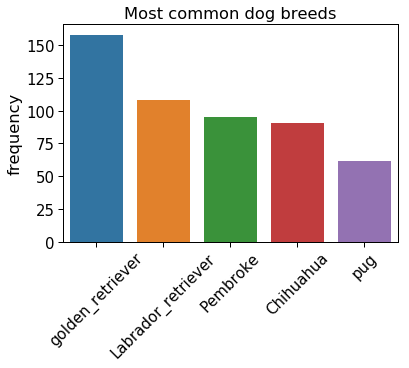

In [70]:
correct_dog_guess = df_master.query('((p1_dog==1) or (p1_dog==0 and p2_dog==True) or (p1_dog==0 and p2_dog==0 and p3_dog==1))') 
dog_on_guess1 = correct_dog_guess[correct_dog_guess['p1_dog']==True].prediction_1.value_counts(sort=True)
dog_on_guess2 = correct_dog_guess.query('p1_dog==0 and p2_dog ==1').prediction_2.value_counts(sort=True)
dog_on_guess3 = correct_dog_guess.query('p1_dog==0 and p2_dog ==0 and p3_dog==1').prediction_3.value_counts(sort=True)

results = (dog_on_guess1 + dog_on_guess2 + dog_on_guess3).sort_values(ascending=False).head(5).to_frame().rename(columns={0:'frequency'})

sns.set_context('paper', font_scale =1.7)
bar_plot2 = sns.barplot(x = results.index, y=results.frequency)
bar_plot2.set_title('Most common dog breeds')

for label in bar_plot2.get_xticklabels():
    label.set_rotation(45)

In [71]:
results.head()

,frequency
golden_retriever,158.0
Labrador_retriever,108.0
Pembroke,95.0
Chihuahua,91.0
pug,62.0


# What is the average rating of all the dogs

In [72]:
df_master.rating_numerator.mean()


10.728438936360554

# What is the average rating for each dog stage, which dog stage receives the most favorites and retweets

In [73]:
dog_stage_groups = df_master.groupby('dog_stage')
results = dog_stage_groups.agg({'rating_numerator':np.mean,'favorite_count':np.mean, 'retweet_count':np.mean}).sort_values(by=['dog_stage'])
results.rating_numerator = results.rating_numerator.round(2)
results.favorite_count=results.favorite_count.astype(int)
results.retweet_count=results.retweet_count.astype(int)

results.rename(columns={'rating_numerator':'rating_out_of_10','favorite_count':'amount_of_favorites','retweet_count':'amount_of_retweets'})

,rating_out_of_10,amount_of_favorites,amount_of_retweets
dog_stage,,,
None,10.61,8581,2509
doggo,11.84,19575,6807
floofer,11.73,8786,2749
multiple,11.42,15958,5007
pupper,10.87,7186,2230
puppo,12.08,21915,6041


# Which rating receives the most likes/retweets

In [74]:
groups = df_master.groupby('rating_numerator')
ratings= groups.agg({'favorite_count':np.mean, 'retweet_count': np.mean})

counts=groups.size().to_frame()
ratings = pd.merge(ratings,counts, left_index=True, right_index=True).rename(columns ={0:'count'}).reset_index()
ratings.favorite_count = ratings.favorite_count.astype(int)
ratings.retweet_count = ratings.retweet_count.astype(int)

ratings.query('count>15')

,rating_numerator,favorite_count,retweet_count,count
10,6.0,3233,1111,16
12,7.0,2312,826,31
13,8.0,2118,736,67
15,9.0,2373,784,130
17,10.0,3708,1286,352
18,11.0,6358,2018,358
21,12.0,11225,3013,423
22,13.0,23164,6858,229
24,14.0,28586,8454,23


Text(0, 0.5, 'Favorites')

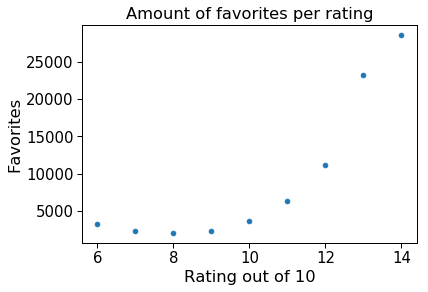

In [75]:
ratings_plot =ratings.query('count >15')
plt.scatter(x=ratings_plot['rating_numerator'], y=ratings_plot['favorite_count'])
plt.title('Amount of favorites per rating')
plt.xlabel('Rating out of 10')
#plt.xlim(2)
plt.ylabel('Favorites')

Text(0, 0.5, 'Retweets')

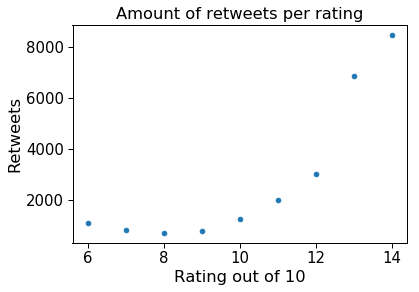

In [76]:
ratings_plot =ratings.query('count >15')
plt.scatter(x=ratings_plot['rating_numerator'], y=ratings_plot['retweet_count'])
plt.title('Amount of retweets per rating')
plt.xlabel('Rating out of 10')
plt.ylabel('Retweets')
